In [38]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import scipy as sci
import json

# Primera medición de las cuadraturas del estado coherente

In [122]:
j = 2
Sets = ["Void", "Coherent_I", "Coherent_II", "Coherent_III"]
Limits = [(145, 155), (156, 167), (168, 179), (180, 192)]
number_file_start = Limits[j][0]
number_file_finish = Limits[j][1]

In [123]:
V_init = 57.11 
V_finish = 58.83
Delta_V = V_finish - V_init
alpha = Delta_V/2*np.pi

Aquí, dado que $\Delta V = 2\pi\alpha $ donde $\alpha$ es una constante de proporcionalidad que pasa de grados a volts.

In [124]:
recorrido_number_file_names = range(number_file_start, number_file_finish + 1)
lista_datos = [None]*len(recorrido_number_file_names)
recorrido_number_file_names

range(168, 180)

In [125]:
def Gaussian(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))

index_lista_datos = 0
voltajes_tomados = np.array(range(0, 12+1))*0.17
theta_tomados = voltajes_tomados*alpha

quadrature = [None]*len(recorrido_number_file_names)
standard_dev = [None]*len(recorrido_number_file_names)
marginals = [None]*len(recorrido_number_file_names)
gaussianas = [None]*len(recorrido_number_file_names)

for i in recorrido_number_file_names:
    file_name = "tek0%sCH1.csv"%(i)
    try:
        lista_datos[index_lista_datos] = pd.read_csv("Datos/{}/{}".format(Sets[j], file_name), skiprows=20)
        quadrature[index_lista_datos] = lista_datos[index_lista_datos]["CH1"].mean()
        standard_dev[index_lista_datos] = lista_datos[index_lista_datos]["CH1"].std()
        marginals[index_lista_datos] = np.histogram(lista_datos[index_lista_datos]["CH1"],bins=13)

        parameters = curve_fit(Gaussian,marginals[index_lista_datos][1][1::],marginals[index_lista_datos][0])
        gaussianas[index_lista_datos] = parameters[0]
    except ValueError:
        print("Ocurrió un error, analizar la iteración con el documento: {}".format(file_name))
    
    index_lista_datos+=1

<IPython.core.display.Javascript object>


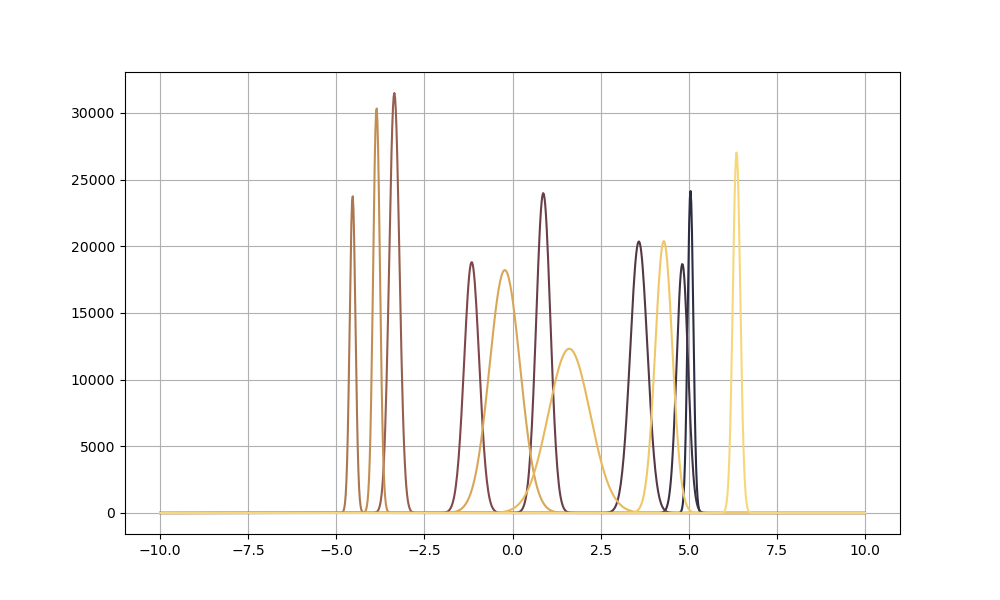

In [126]:
fig, ax = plt.subplots(figsize=(10,6))
x_linspace_marginal = np.linspace(-10,10,1000)
colors = ["#2B2D42", "#3F3244", "#553846", "#6A3F48", "#80464A", 
          "#965E4D", "#AC7650", "#C28E54", "#D8A658", "#E8B85D", 
          "#F0C869", "#F6D87A", "#FAE78D", "#FCEF9F", "#FFF7B2"]


plt.grid(True)
for i in range(0, len(gaussianas)):
    try:
        plt.plot(x_linspace_marginal,Gaussian(x_linspace_marginal,gaussianas[i][0],gaussianas[i][1],gaussianas[i][2]), color = colors[i])
    except TypeError:
        print("Ocurrió un error al analizar el componente de la iteración {}.".format(i))
        None

<IPython.core.display.Javascript object>


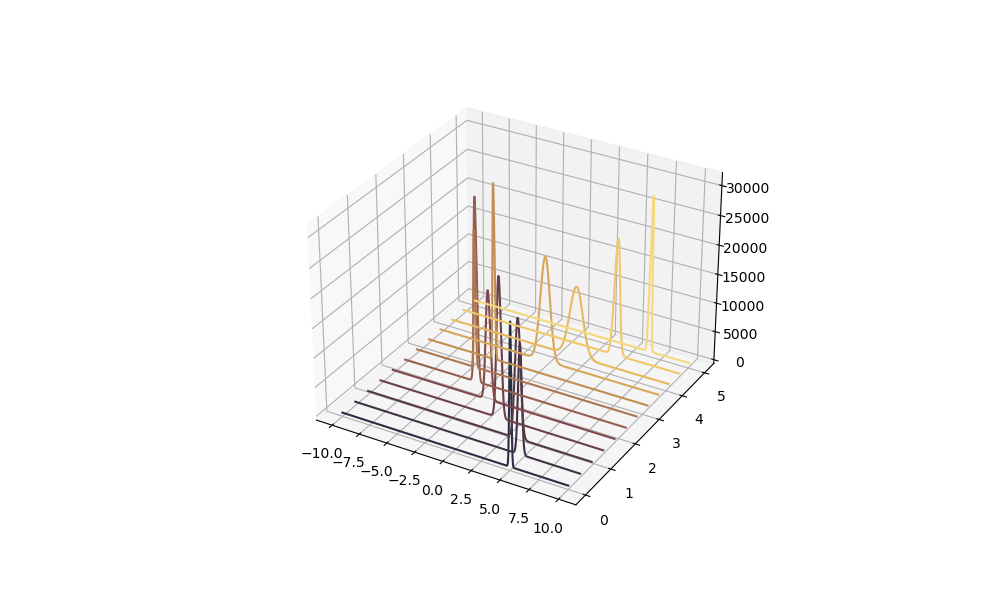

In [127]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,6))
index_lista_datos = 0
marginales_plot = np.array([None]*len(recorrido_number_file_names))
pr = [None]*len(recorrido_number_file_names)

for i in recorrido_number_file_names:
    try:
        pr[index_lista_datos] = Gaussian(x_linspace_marginal,gaussianas[index_lista_datos][0],gaussianas[index_lista_datos][1],gaussianas[index_lista_datos][2]).tolist()
        marginales_plot[index_lista_datos] = Gaussian(x_linspace_marginal,gaussianas[index_lista_datos][0],gaussianas[index_lista_datos][1],gaussianas[index_lista_datos][2])
        ax.plot(x_linspace_marginal, theta_tomados[index_lista_datos]*np.ones_like(x_linspace_marginal), marginales_plot[index_lista_datos], color = colors[index_lista_datos])
        index_lista_datos += 1
    except TypeError:
        None

In [128]:
x = x_linspace_marginal.tolist()
phi = theta_tomados.tolist()

In [129]:
pr

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

In [130]:
nombre_archivo = "{}.json".format(Sets[j])

datos = {
    "phi": phi,
    "x": x,
    "pr": pr
}

with open(nombre_archivo, "w", encoding="utf-8") as archivo:
    json.dump(datos, archivo, indent=2)

print(f"Archivo '{nombre_archivo}' creado exitosamente.")


Archivo 'Coherent_II.json' creado exitosamente.
